# Given correlation coefficient r of X and Y, and given X, now generate Y.

In [1]:
# plot results 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap
import networkx as nx

# here..
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

x_y_label_font = 20
x_y_legend_font = 20

plt.rc('font', family='Times New Roman')
fig_dpi = 220
fig_shape_squre = (6, 5)

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh), dpi=100)
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
    plt.show()


class MyColor(object):
    def __init__(self, cmap_name, skip_idx=5, backup_name='Set1', 
                 backup_color=3, add_red=False, pre_defined=False):
        if pre_defined:
            # colors = ['#3682be','#45a776','#f05326','#eed777','#334f65','#b3974e','#38cb7d','#ddae33','#844bb3','#93c555','#5f6694','#df3881']
            colors = '00a8e1 - 99cc00 - e30039 - 800080 - 00994e - ff6600 - 808000 - db00c2 - 008080 - 0000ff - c8cc00'
            colors = ["#"+c.strip() for c in colors.split('-')]
            print(colors)
            cmap = ListedColormap(colors, name = 'mycmap')
            self.color_set = list(cmap.colors)
        else:
            if isinstance(cmap_name, list):
                #NOTE: combine all cmaps:
                self.color_set = []
                for cname in cmap_name:
                    self.color_set.extend(list(plt.get_cmap(cname).colors))
                print('color_set: ', self.color_set[15])
            else:
                self.color_set = list(plt.get_cmap(cmap_name).colors)
                
        # NOTE: always ignore light yellow in Set1

        if add_red:
            self.light_set = list(plt.get_cmap('Set1').colors)
            self.color_set  = [v for i, v in enumerate(list(plt.get_cmap(cmap_name).colors)[:-1]) if i!=5]
            self.color_set.extend([self.light_set[0]])
            self.color_set.extend([self.light_set[4]])

        self.backup_set = plt.get_cmap(backup_name).colors
        self.backup_color = backup_color
        self.skip_idx=skip_idx
        self.idx = 0
        self.color_len = len(self.color_set)
        
    def get_color(self):
        if self.idx == self.color_len - 1:
            self.idx = 0
        if self.idx == self.skip_idx:
            self.idx += 1
            return self.backup_set[self.backup_color]
        color = self.color_set[self.idx]
        self.idx += 1
        return color
    
    def shuffle(self):
        np.random.shuffle(self.color_set)
    

plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])


<Figure size 640x338.2 with 13 Axes>

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


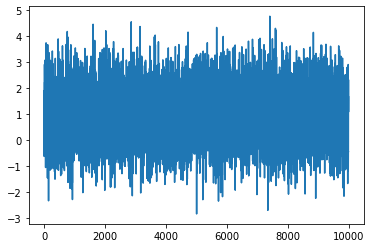

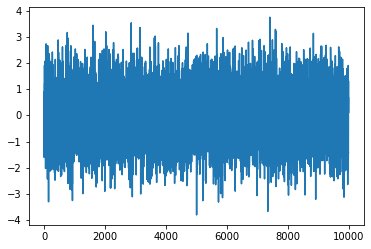

mean_X1:  1.0658141036401503e-17
mean_X2:  7.744915819785092e-17
mean_X3:  -6.039613253960852e-17


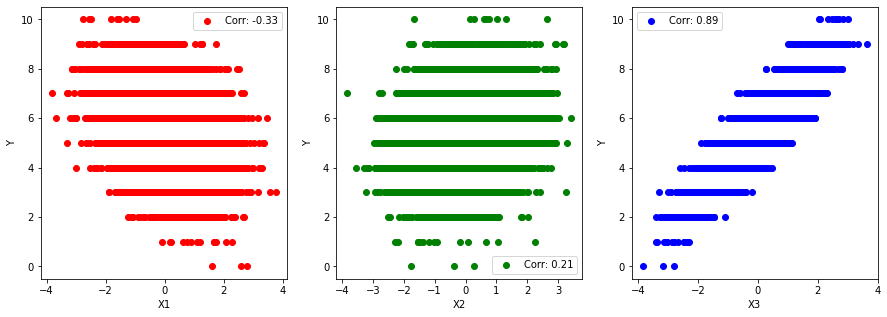

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing


def z_norm(x_data):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(x_data)

def mean_norm(x_data):
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(x_data)


def generate_Y_from_X(X1, X2, X3, r1, r2, r3):
    """
    Generates values for variable Y from {0, 1, 2} based on the given independent variables X1, X2, X3 and their
    corresponding correlation coefficients r1, r2, r3.
    
    Args:
        X1 (ndarray): Sample of variable X1 from normal distribution.
        X2 (ndarray): Sample of variable X2 from normal distribution.
        X3 (ndarray): Sample of variable X3 from normal distribution.
        r1 (float): Correlation coefficient between X1 and Y.
        r2 (float): Correlation coefficient between X2 and Y.
        r3 (float): Correlation coefficient between X3 and Y.
        
    Returns:
        ndarray: Generated values for variable Y.
    """
    # Calculate the mean and standard deviation of X1, X2, X3
    X1= X1.squeeze()
    X2= X2.squeeze()
    X3= X3.squeeze()
    
    mean_X1 = np.mean(X1)
    mean_X2 = np.mean(X2)
    mean_X3 = np.mean(X3)
    
    print('mean_X1: ', mean_X1)
    print('mean_X2: ', mean_X2)
    print('mean_X3: ', mean_X3)
    
    std_X1 = np.std(X1)
    std_X2 = np.std(X2)
    std_X3 = np.std(X3)
    
    # Calculate the standard deviation of Y
    std_Y = np.sqrt((std_X1**2 * r1**2 + std_X2**2 * r2**2 + std_X3**2 * r3**2) / (r1**2 + r2**2 + r3**2 + 2*r1*r2*r3))
    
    # Generate values for Y from normal distribution with mean 0 and calculated standard deviation
    # Y = np.random.normal(loc=0, scale=std_Y, size=len(X1))
    
    # Add the means of X1, X2, X3 and the calculated standard deviation of Y to the generated values to get the final values for Y
    # Y = mean_X1 + mean_X2 + mean_X3 + r1 * ((X1 - mean_X1) * std_Y / std_X1) + r2 * ((X2 - mean_X2) * std_Y / std_X2) + r3 * ((X3 - mean_X3) * std_Y / std_X3)
    Y = r1 * ((X1 - mean_X1) * std_Y / std_X1) \
        + r2 * ((X2 - mean_X2) * std_Y / std_X2) \
        + r3 * ((X3 - mean_X3) * std_Y / std_X3)
    
    # Round the generated values of Y to the nearest integer and clip them to be within {0, 1, 2}
    # Y = np.round(Y * 49 + 50).clip(0, 2).astype(int)
    Y = z_norm(Y.reshape(-1, 1))
    Y = Y.squeeze()
    Y = np.round(Y * 10).astype(int)
    
    return Y

# Generate samples of X1, X2, X3 with sample size 100 from normal distribution

normal_dist = True
sample_size=  10000

if not normal_dist:
    X1 = np.random.uniform(10, 100, size=sample_size)
    X2 = np.random.uniform(20, 50, size=sample_size)
    X3 = np.random.uniform(0, 1, size=sample_size)
else:
    X1 = np.random.normal(loc=1, scale=1, size=sample_size)
    X2 = np.random.normal(loc=2, scale=1, size=sample_size)
    X3 = np.random.normal(loc=3, scale=1, size=sample_size)

# Specify the correlation coefficients between X1, X2, X3, and Y
r1 = -0.3
r2 = 0.2
r3 = 0.8

use_z_norm = False

norm = z_norm if use_z_norm else mean_norm

plt.figure()
plt.plot(X1)
plt.show()
X1 = norm(X1.reshape(-1, 1))

plt.figure()
plt.plot(X1)
plt.show()

X2 = norm(X2.reshape(-1, 1))
X3 = norm(X3.reshape(-1, 1))

# Generate values for Y based on X1, X2, X3, and their correlation coefficients
Y = generate_Y_from_X(X1, X2, X3, r1, r2, r3)

# Check the Pearson correlation between X1 and Y, X2 and Y, X3 and Y
corr_X1_Y, _ = pearsonr(X1.squeeze(), Y)
corr_X2_Y, _ = pearsonr(X2.squeeze(), Y)
corr_X3_Y, _ = pearsonr(X3.squeeze(), Y)

# Plot the linear correlation figures for X1 vs Y, X2 vs Y, X3 vs Y in a single figure with different colors
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(X1, Y, color='r', label=f'Corr: {corr_X1_Y:.2f}')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[0].legend()

ax[1].scatter(X2, Y, color='g', label=f'Corr: {corr_X2_Y:.2f}')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Y')
ax[1].legend()

ax[2].scatter(X3, Y, color='b', label=f'Corr: {corr_X3_Y:.2f}')
ax[2].set_xlabel('X3')
ax[2].set_ylabel('Y')
ax[2].legend()

# new Y generatation by Theorem 1:

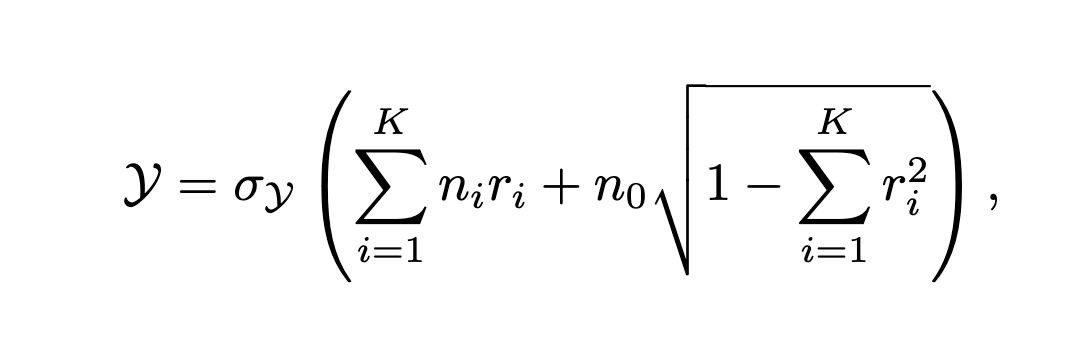

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing
from functools import reduce

def z_norm(x_data):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(x_data), min_max_scaler

def mean_norm(x_data):
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(x_data)


sigmas = [1, 2, 3]

def get_XY(uniform=True, mix=False, class_num=10):
        
    sample_size =  5000
    
    if not uniform:
        ns = [np.random.normal(loc=0, scale=sigmas[i], size=sample_size) for i in range(len(sigmas))]
    else:
        ns = [np.random.uniform(0, 1, size=sample_size) for _ in range(len(sigmas))]

    if mix:
        ns[-1] =  np.random.normal(loc=0, scale=1, size=sample_size) if uniform else np.random.uniform(-np.sqrt(3), np.sqrt(3), size=sample_size)
    # Specify the correlation coefficients between X1, X2, X3, and Y

    rs = [-0.4, 0.1, 0.7]
    
    sum_rs = np.sum([r**2 for r in rs])
    print('sum_rs:', sum_rs)

    scale = np.sqrt(12) if uniform else 1
    scale = 1

    sigma_y = 1

    r5 = np.sqrt(1 - np.sum([r**2 for r in rs]))
    rs.extend([r5])

    Xs = [1*ns[i] for i in range(len(sigmas))]
    # Xs = [sigmas[i]*ns[i] for i in range(len(sigmas))]
    
    Y = scale * sigma_y * (reduce(lambda x, y: x+y, map(lambda x: x[0]*x[1], zip(rs, ns))))

    Y, _ = z_norm(Y.reshape(-1, 1))
    
    Y = Y.squeeze()
    Y = np.round(Y * class_num).astype(int)
    
    return Xs, Y


sum_rs: 0.6599999999999999
count Y_norm:  Counter({4: 850, 6: 817, 5: 788, 7: 668, 3: 637, 2: 416, 8: 400, 9: 199, 1: 187, 10: 22, 0: 16})
sum_rs: 0.6599999999999999
count Y_uni:  Counter({5: 1371, 6: 1229, 4: 957, 7: 621, 3: 434, 8: 205, 2: 112, 9: 39, 1: 25, 0: 4, 10: 3})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


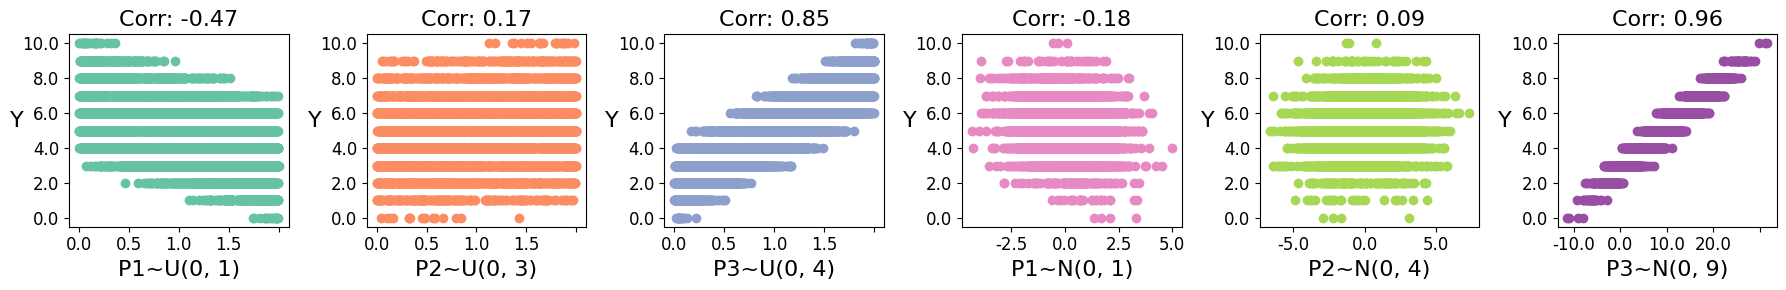

In [4]:

# # ROUND:

colors = MyColor(cmap_name="Set2")

def plot_xy(Xs, Y, ax, x_label):
    # Check the Pearson correlation between X1 and Y, X2 and Y, X3 and Y
    for i in range(len(ax)):
        # corr_Xi_Y, _ = pearsonr(Xs[i].squeeze(), Y[int(i/3)])
        corr_Xi_Y, _ = pearsonr(Xs[i].squeeze(), Y)
        ax[i].scatter(Xs[i], Y, color=colors.get_color(), label=f'Corr: {corr_Xi_Y:.2f}')
        ax[i].set_xlabel(x_label[i],fontsize=16)
        ax[i].set_ylabel('Y', fontsize=16,  rotation = 0)
        ax[i].set_title(f'Corr: {corr_Xi_Y:.2f}', fontsize=16)
        ax[i].set_xticklabels(ax[i].get_xticks(), fontsize=12)
        ax[i].set_yticklabels(ax[i].get_yticks(), fontsize=12)
# Y = np.round(Y).astype(int)
from collections import Counter

Xs_uni, Y_uni = get_XY(uniform=True)
print('count Y_norm: ', Counter(Y_uni))

Xs_norm, Y_norm = get_XY(uniform=False, mix=False)
print('count Y_uni: ', Counter(Y_norm))

# Plot the linear correlation figures for X1 vs Y, X2 vs Y, X3 vs Y in a single figure with different colors
fig, axes = plt.subplots(1, 6, figsize=(18, 3), dpi=100)

# Xs_uni.extend(Xs_norm)

plot_xy(Xs_uni, Y_uni, axes[:3], ['P1~U(0, 1)', 'P2~U(0, 3)', 'P3~U(0, 4)'])
plot_xy(Xs_norm, Y_norm, axes[3:], ['P1~N(0, 1)', 'P2~N(0, 4)', 'P3~N(0, 9)'])

fig.tight_layout()

sum_rs: 1.2900000000000003
count Y_norm:  Counter({10: 522, 11: 456, 9: 438, 8: 411, 12: 403, 7: 375, 13: 341, 14: 321, 6: 290, 5: 235, 15: 232, 16: 214, 4: 185, 17: 158, 3: 154, 2: 93, 18: 76, 19: 50, 1: 36, 0: 5, 20: 5})
sum_rs: 1.2900000000000003
count Y_uni:  Counter({10: 784, 11: 724, 9: 663, 12: 545, 8: 529, 13: 437, 7: 387, 14: 284, 6: 208, 15: 136, 5: 114, 16: 63, 4: 47, 17: 30, 3: 23, 18: 18, 2: 4, 20: 1, 0: 1, 1: 1, 19: 1})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


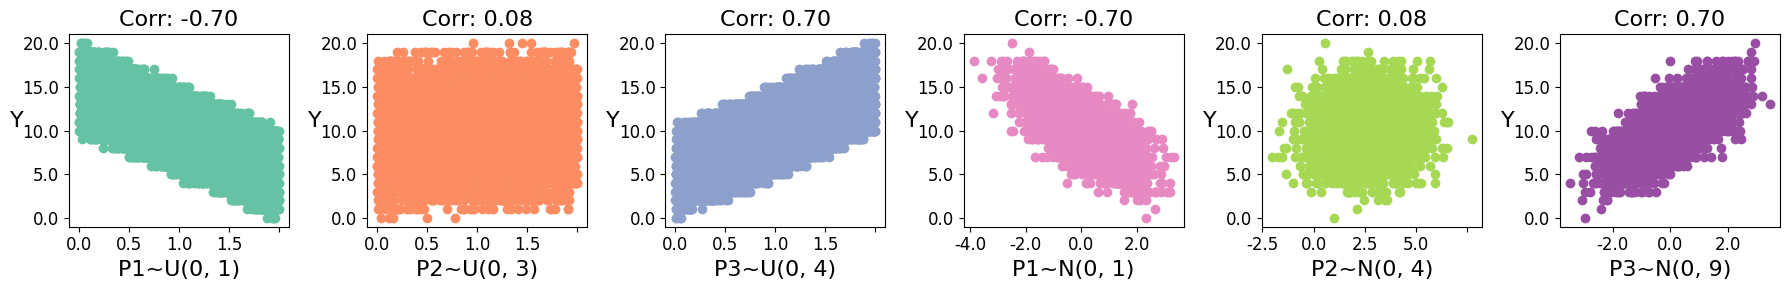

In [18]:

# # ROUND:

colors = MyColor(cmap_name="Set2")

def plot_xy(Xs, Y, ax, x_label):
    # Check the Pearson correlation between X1 and Y, X2 and Y, X3 and Y
    for i in range(len(ax)):
        # corr_Xi_Y, _ = pearsonr(Xs[i].squeeze(), Y[int(i/3)])
        corr_Xi_Y, _ = pearsonr(Xs[i].squeeze(), Y)
        ax[i].scatter(Xs[i], Y, color=colors.get_color(), label=f'Corr: {corr_Xi_Y:.2f}')
        ax[i].set_xlabel(x_label[i],fontsize=16)
        ax[i].set_ylabel('Y', fontsize=16,  rotation = 0)
        ax[i].set_title(f'Corr: {corr_Xi_Y:.2f}', fontsize=16)
        ax[i].set_xticklabels(ax[i].get_xticks(), fontsize=12)
        ax[i].set_yticklabels(np.round(ax[i].get_yticks(), 1), fontsize=12)
# Y = np.round(Y).astype(int)
from collections import Counter

class_num = 20

Xs_uni, Y_uni = get_XY(uniform=True, class_num=class_num)
print('count Y_norm: ', Counter(Y_uni))

Xs_norm, Y_norm = get_XY(uniform=False, mix=False, class_num=class_num)
print('count Y_uni: ', Counter(Y_norm))

# Plot the linear correlation figures for X1 vs Y, X2 vs Y, X3 vs Y in a single figure with different colors
fig, axes = plt.subplots(1, 6, figsize=(18, 3), dpi=100)

# Xs_uni.extend(Xs_norm)

plot_xy(Xs_uni, Y_uni, axes[:3], ['P1~U(0, 1)', 'P2~U(0, 3)', 'P3~U(0, 4)'])
plot_xy(Xs_norm, Y_norm, axes[3:], ['P1~N(0, 1)', 'P2~N(0, 4)', 'P3~N(0, 9)'])

fig.tight_layout()

# NOW, generate graphs with - $\color{red}{given\ properties}$
- $\color{red}{NOTE}$ that, the class is imbalanced.
- $\color{red}{LIST}$ all properties with fixed N: average degree, CC, density, triangles, 4-cycles, 6-cycles, 8-cycles.

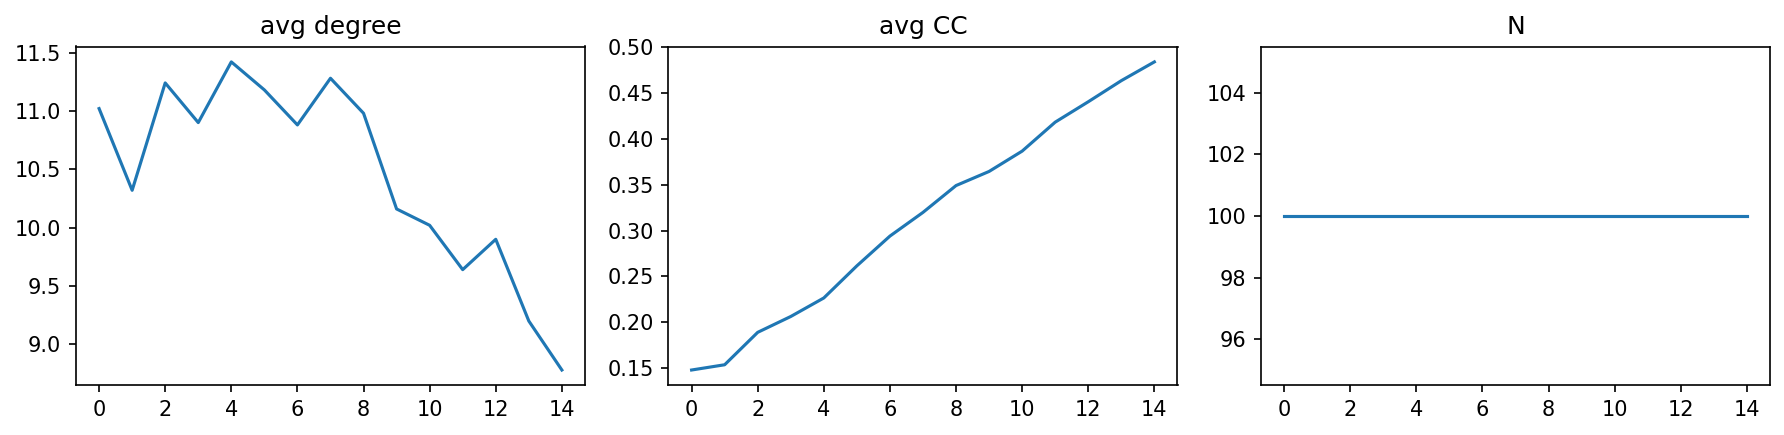

In [5]:
from functools import reduce
from scipy.sparse import csr_matrix
import random

def rewire_given_cc(desired_cc, G, node_num):
    # Calculate the number of triangles needed to achieve the desired clustering coefficient
    adj = nx.adjacency_matrix(G)
    degrees = [i-1 for i in np.sum(adj, axis=1) if i > 1]
    total_triads = reduce(lambda x, y:x+y, map(lambda x: x*(x-1)/2, degrees))
    desired_triads = int(desired_cc * total_triads)
    actual_triads = sum(nx.triangles(G).values()) // 3
    triads_to_add = desired_triads - actual_triads
    # Add triangles to the graph
    while triads_to_add > 0:
        u, v = random.sample(G.nodes(), k=2)
        if not G.has_edge(u, v) and not G.has_edge(v, u) and not u == v:
            neighbors_u = set(G.neighbors(u))
            neighbors_v = set(G.neighbors(v))
            common_neighbors = neighbors_u.intersection(neighbors_v)
            if len(common_neighbors) > 0:
                w = random.choice(list(common_neighbors))
                G.add_edge(u, v)
                G.add_edge(u, w)
                G.add_edge(v, w)
                triads_to_add -= 1
            
    return G


def add_triangles(G, target_cc, tris_num):
    
    er_nodes = list(G.nodes)
    node_num = len(er_nodes)
    
    tris = [nx.complete_graph(3) for _ in range(tris_num)]
    label_id = node_num
    for i, tr in enumerate(tris):
        tris[i] = nx.relabel_nodes(tr, {0: label_id, 1: label_id+1, 2: label_id+2})
        label_id+=3

    for tr in tris:
        tr_nodes = list(tr.nodes)
        G.add_edge(random.choice(er_nodes), random.choice(tr_nodes))

    for tr in tris:
        G = nx.compose(G, tr)
    
    return G


def get_Y(ns,  rs = None, is_uniform=True):
    
    sum_rs = np.sum([r**2 for r in rs])
    print('sum_rs:', sum_rs)

    scale = np.sqrt(12) if is_uniform else 1
    sigma_y = 1

    r_y = np.sqrt(1 - np.sum([r**2 for r in rs]))
    rs.extend([r_y])

    Y = scale * sigma_y * (reduce(lambda x, y: x+y, map(lambda x: x[0]*x[1], zip(rs, ns))))

    Y, _ = z_norm(Y.reshape(-1, 1))
    Y = Y.squeeze()
    Y = np.round(Y * 10).astype(int)
    
    return Y

# tris_num = 10
# tris_num = N*(target_cc - ACC_ER) / (1 - target_cc)

er_nodes = 100

tris_num = np.arange(1, int(er_nodes/6)) # 15
# print('tris_num:  ', tris_num)

samples = []
for tr_num in tris_num:
    G = nx.erdos_renyi_graph(er_nodes - tr_num*3, 0.1 + tr_num*0.01)
    samples.append(add_triangles(G, 1, tr_num))

avg_degrees = [sum(dict(G.degree()).values()) / len(G) for G in samples]

avg_CCs = [nx.average_clustering(G) for G in samples]
Ns = [len(G) for G in samples]
fig, axes = plt.subplots(1, 3, figsize=(12, 3), dpi=150)
axes[0].plot(avg_degrees)
axes[0].set_title('avg degree')
axes[1].plot(avg_CCs)
axes[1].set_title('avg CC')
axes[2].plot(Ns)
axes[2].set_title('N')

# axes[1].plot(check_avg_degree)

plt.tight_layout()

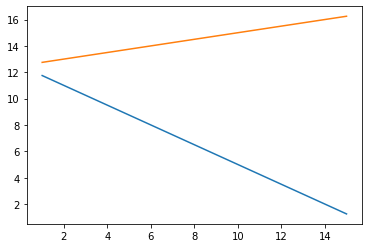

In [6]:
# edge_num = tr_num * 3 + 4 * square_num is fixex:

tr_num = np.arange(1, int(100/6)) # 15
total = 50
sq_num = (total - 3*tr_num)/4
plt.figure()
plt.plot(tr_num, sq_num)
plt.plot(tr_num, tr_num+sq_num)
plt.show()

In [7]:
import random
from functools import reduce
import pickle as pk
import os

from sklearn import preprocessing
import networkx as nx
import torch
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.utils import from_networkx
from scipy.stats import pearsonr


# fixed node num, fixed average degree, CC ~ U(0.1, 0.5)
def z_norm(x_data):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(x_data), min_max_scaler

def mean_norm(x_data):
    scaler = preprocessing.StandardScaler()
    return scaler.fit_transform(x_data)


def connect_graphs(g1, g2):
    n1 = list(g1.nodes)
    n2 = list(g2.nodes)
    e1 = random.choices(n1, k=1)[0]
    e2 = random.choices(n2, k=1)[0]
    g_cur = nx.compose(g1, g2)
    g_cur.add_edge(e1, e2)
    return g_cur


def random_connect_graph(graph_list:list):
    # NOTE: relabeling the nodes.
    
    new_graphs = []
    np.random.shuffle(graph_list)
    node_idx = 0
    for g in graph_list:
        len_nodes = len(list(g.nodes))
        mapping = {}
        for i in range(len_nodes):
            mapping[i] = i+node_idx
        new_g = nx.relabel_nodes(g, mapping)
        new_graphs.append(new_g)
        node_idx += len_nodes
        
    g_all = reduce(connect_graphs, new_graphs)
    return g_all


def add_square(G, sq_num):
     
    er_nodes = list(G.nodes)
    node_num = len(er_nodes)
    
    added = [nx.cycle_graph(4) for _ in range(sq_num)]
    
    # line graphs:
    
    label_id = node_num
    for i, tr in enumerate(added):
        added[i] = nx.relabel_nodes(tr, {0: label_id, 1: label_id+1, 2: label_id+2, 3:label_id+3})
        label_id+=4

    for tr in added:
        tr_nodes = list(tr.nodes)
        G.add_edge(random.choice(er_nodes), random.choice(tr_nodes))
        er_nodes = list(G.nodes)

    for tr in added:
        G = nx.compose(G, tr)
    
    return G


def add_triangles(G, tris_num, tri=None):
    
    er_nodes = list(G.nodes)
    node_num = len(er_nodes)
    
    if tri is None:
        tris = [nx.complete_graph(3) for _ in range(tris_num)]
    else:
        # copy tri:
        tris = [tri.copy() for _ in range(tris_num)]
        
    label_id = node_num
    for i, tr in enumerate(tris):
        tris[i] = nx.relabel_nodes(tr, {0: label_id, 1: label_id+1, 2: label_id+2})
        label_id+=3

    for tr in tris:
        tr_nodes = list(tr.nodes)
        G.add_edge(random.choice(er_nodes), random.choice(tr_nodes))

    for tr in tris:
        G = nx.compose(G, tr)
    
    return G


def get_Y(ns, class_num, rs = None, is_uniform=True):
    
    sum_rs = np.sum([r**2 for r in rs])
    print('sum_rs:', sum_rs)

    scale = np.sqrt(12) if is_uniform else 1
    sigma_y = 1

    r_y = np.sqrt(1 - np.sum([r**2 for r in rs]))
    rs.extend([r_y])
        
    Y = scale * sigma_y * (reduce(lambda x, y: x+y, map(lambda x: x[0]*x[1], zip(rs, ns))))

    Y, _ = z_norm(Y.reshape(-1, 1))
    Y = Y.squeeze()
    Y = np.round(Y * (class_num-1)).astype(int)
    
    return Y


def convert_to_torch_geometric_data(graphs, Y):
    data_list = []
    for i, graph in enumerate(graphs):
        
        nx.set_node_attributes(graph, torch.ones(1), 'x')
        # nx.set_edge_attributes(graph, torch.randn(graph.number_of_edges(), 1), 'edge_attr')
        data = from_networkx(graph)
        data.y = torch.tensor([Y[i]], dtype=torch.long)
        data_list.append(data)
    return data_list


class SynDataset(InMemoryDataset):
    def __init__(self, data=None, name=None, root=None, transform=None, pre_transform=None):
        super(SynDataset, self).__init__(root, transform, pre_transform)
        if data is None:
            data_path = os.path.join(root, f'syn_{name}.pkl')
            with open(data_path, 'rb') as f:
                data = pk.load(f)
                
        self.num_tasks = len({int(i.y.item()) for i in data})
        self.data, self.slices = self.collate(data)
        self.name = name
        self.root = root

    def _download(self):
        pass

    def _process(self):
        pass

def graph_avg_degree(adj):
    if not isinstance(adj, np.ndarray):
        adj = adj.todense()
    degrees = np.sum(adj, axis=1).reshape(adj.shape[0], 1)
    mean_D = np.mean(degrees).astype(np.float32).reshape(1)
    return mean_D


def dump_ER_graphs_by_Degree(sample_num, class_num, rs, er_nodes=100, min_D=5, max_D=50, name=None):
    """
    return labels and graphs.
    """
    
    ori_dd = np.random.uniform(min_D, max_D, size=(sample_num,1))
    normed_dd, scaler = z_norm(ori_dd)
    
    n_dd = np.random.uniform(0, 1, size=(sample_num, 1))
    # n_cc = np.random.normal(loc=0, scale=1, size=(sample_num, 1))
    
    dd = scaler.inverse_transform(n_dd)
 
    ps = dd / er_nodes
    
    samples = []
    
    rand_p = np.random.normal(loc=0, scale=0.01, size=(sample_num,))
    rand_node = np.random.normal(loc=0, scale=3, size=(sample_num,))
    
    cc_cur = []
    for i in range(sample_num):
        G = nx.erdos_renyi_graph(er_nodes + abs(int(rand_node[i])), abs(rand_p[i]) + ps[i])
        cc_cur.append(nx.average_clustering(G))
        samples.append(G)
  
    n_y = np.random.uniform(0, 1, size=(sample_num, 1))
    Y = get_Y([n_dd, n_y], class_num, rs=rs, is_uniform=True)
    print(Y.shape)
    print('len samples:', len(samples))
    
    # if abs(corr_degree) > 0.1, regenerate the samples.
    
    avg_degree = np.array([graph_avg_degree(nx.to_numpy_matrix(g)) for g in samples])
    
    corr_degree, _ = pearsonr(avg_degree.reshape(-1, 1).squeeze(), Y.squeeze())
    corr_cc, _ = pearsonr(np.array(cc_cur), Y.squeeze())
    # corr_degree = np.corrcoef(Y, avg_degree)[0, 1]
    print('corr_cc', corr_cc, ' corr_degree:', corr_degree)
   
    
    # calculate the pearson correlation coefficient of Y and avg_degree:
    # Calculate the average degree using the average_degree_connectivity() function
    # avg_degree_fix = 2 * np.ones((100,)) + np.random.normal(loc=0, scale=0.1, size=(100,))
    # corr_degree_fix = np.corrcoef(Y, avg_degree_fix)[0, 1]
    # print('corr_degree: ', corr_degree, corr_degree_fix)
    # print('corr new_cc:', np.corrcoef(Y, new_cc)[0, 1])
    # plt.figure()
    # plt.plot(avg_degree[sort_idx])
    # plt.plot(Y[sort_idx])
    # plt.title('avg_degree')
    
    pyg_data = convert_to_torch_geometric_data(samples, Y)
    
    root = 'DATA'
    name = f'degree_{rs[0]}' if name is None else name
    if not os.path.exists(root):
        os.mkdir(root)
    data_path = os.path.join(root, f'syn_{name}.pkl')
    with open(data_path, 'wb') as f:
        pk.dump(pyg_data, f)
    return True


def dump_ER_graphs_by_CC(sample_num, class_num, rs, er_nodes=100, min_CC=0.1, max_CC=0.5, name=None):
    """
    return labels and graphs.
    """
    ori_cc = np.random.uniform(min_CC, max_CC, size=(sample_num,1))
    normed_cc, scaler = z_norm(ori_cc)
    
    n_cc = np.random.uniform(0, 1, size=(sample_num, 1))
    # n_cc = np.random.normal(loc=0, scale=1, size=(sample_num, 1))
    
    cc = scaler.inverse_transform(n_cc)
    
    # # NOTE: plot the distribution of CC:
    # sort_idx = np.argsort(cc.squeeze())
    # plt.figure()
    # plt.plot(ori_cc[sort_idx])
    # plt.figure()
    # plt.plot(cc[sort_idx])
    
    tris = cc * 30
    
    samples = []
    rand_p = np.random.normal(loc=0, scale=0.05, size=(sample_num,))
    rand_node = np.random.normal(loc=0, scale=3, size=(sample_num,))
    
    # add random tri_num:
    rand_tri = np.random.normal(loc=0, scale=10, size=(sample_num,))
    # suppose total edges are fixed.
    
    
    # edge_num = tr_num * 3 + 4 * square_num is fixex:
    total_edge_num = er_nodes//2
    cc_cur = []
    for i in range(sample_num):
        tr_num = int(tris[i])
        G = nx.erdos_renyi_graph(er_nodes, abs(rand_p[i]))

        # G = nx.erdos_renyi_graph(er_nodes - tr_num * 3 + abs(int(rand_node[i])),
        #                          abs(rand_p[i]) - tr_num * 0.01)
        
        new_G = add_triangles(G, tr_num)
        sq_num = (total_edge_num - tr_num * 3) // 4
        new_G = add_square(new_G, sq_num)
        cc_cur.append(nx.average_clustering(new_G))
        
        samples.append(new_G)
        
    # NOTE: check labels:
    # new_cc = np.array([nx.average_clustering(g) for g in samples])
    # plt.figure()
    # plt.plot(new_cc[sort_idx])
    
    n_y = np.random.uniform(0, 1, size=(sample_num, 1))
    Y = get_Y([n_cc, n_y], class_num, rs=rs, is_uniform=True)
    print(Y.shape)
    print('len samples:', len(samples))
    
    # if abs(corr_degree) > 0.1, regenerate the samples.
    
    avg_degree = np.array([graph_avg_degree(nx.to_numpy_matrix(g)) for g in samples])
    
    corr_degree, _ = pearsonr(avg_degree.reshape(-1, 1).squeeze(), Y.squeeze())
    corr_cc, _ = pearsonr(np.array(cc_cur), Y.squeeze())
    # corr_degree = np.corrcoef(Y, avg_degree)[0, 1]
    print('corr_cc', corr_cc)
    
    if abs(corr_degree) >= 0.1:
        print('no ok:', corr_degree)
        return False
    else:
        print('corr:', corr_degree)
    
    
    pyg_data = convert_to_torch_geometric_data(samples, Y)
    
    root = 'DATA'
    name = f'cc_{rs[0]}' if name is None else name
    if not os.path.exists(root):
        os.mkdir(root)
    data_path = os.path.join(root, f'syn_{name}.pkl')
    with open(data_path, 'wb') as f:
        pk.dump(pyg_data, f)
    return True

# save datasets
import pickle as pk

def save_datasets(datasets, file_name):
    with open(file_name, 'wb') as f:
        pk.dump(datasets, f)

def load_datasets(file_name):
    with open(file_name, 'rb') as f:
        datasets = pk.load(f)
    return datasets

In [ ]:
ok = dump_ER_graphs_by_CC(1000, 10, rs=[0.8], er_nodes=100, name='syn_test_cc_0.8')
while not ok:
    ok = dump_ER_graphs_by_CC(1000, 10, rs=[0.8], er_nodes=100, name='syn_test_cc_0.8')

In [ ]:

test_cc = load_datasets('DATA/syn_test_cc.pkl')

# 2023.05.29, Generate dataset with high correlation between degree and labels, as well as CC.
- do not control the dedgree, just ER to control, but the edges ????

In [62]:
class_num = 10
for i in range(1, 10):
    correlation = i/10
    print(correlation)
    ok = dump_ER_graphs_by_Degree(2048, class_num, rs=[correlation], name=f'degree_{correlation}_{round(correlation, 1)}_class{class_num}')

0.1
sum_rs: 0.010000000000000002
(2040,)
len samples: 2040
corr_cc 0.11733636096590087  corr_degree: 0.11779115531624144
0.2
sum_rs: 0.04000000000000001
(2040,)
len samples: 2040
corr_cc 0.18914243761150057  corr_degree: 0.18871865161957763
0.3
sum_rs: 0.09
(2040,)
len samples: 2040
corr_cc 0.3247939502485461  corr_degree: 0.3265152295342003


KeyboardInterrupt: 

# $syn_{cc}\{correlation\}$: generate datasets: correlation from [0.1, 0.2, ..., 0.9]

In [ ]:
for i in range(1, 10):
    correlation = i/10
    print(correlation)
    ok = dump_ER_graphs_by_CC(4096, 10, rs=[correlation])
    while not ok:
        ok = dump_ER_graphs_by_CC(4096, 10, rs=[correlation])

In [73]:
class_num = 5
for i in range(1, 10):
    correlation = i/10
    print(correlation)
    ok = dump_ER_graphs_by_CC(2048, class_num, rs=[correlation], name=f'syn_{round(correlation, 1)}_class{class_num}')
    while not ok:
        ok = dump_ER_graphs_by_CC(2048, class_num, rs=[correlation], name=f'syn_{round(correlation, 1)}_class{class_num}')

0.1
sum_rs: 0.010000000000000002
(2048,)
len samples: 2048
corr_cc 0.10877758190595338
corr: 0.020489407193439148
0.2
sum_rs: 0.04000000000000001
(2048,)
len samples: 2048
corr_cc 0.17471496129702319
corr: -0.022655493357033367
0.3
sum_rs: 0.09
(2048,)
len samples: 2048
corr_cc 0.29016281925973825
corr: -0.01714632896905642
0.4
sum_rs: 0.16000000000000003
(2048,)
len samples: 2048
corr_cc 0.3444752906011172
corr: 0.0035890891220190617
0.5
sum_rs: 0.25
(2048,)
len samples: 2048
corr_cc 0.4533710813471318
corr: 0.040158535049937265
0.6
sum_rs: 0.36
(2048,)
len samples: 2048
corr_cc 0.5155159092969093
corr: 0.005355394576086326
0.7
sum_rs: 0.48999999999999994
(2048,)
len samples: 2048
corr_cc 0.6093532580913033
corr: -0.025197613369444465
0.8
sum_rs: 0.6400000000000001
(2048,)
len samples: 2048
corr_cc 0.7007812563563833
corr: 0.00744043356330025
0.9
sum_rs: 0.81
(2048,)
len samples: 2048
corr_cc 0.7859878209449342
corr: 0.008435101327066898


In [44]:
class_num = 2
for i in range(1, 10):
    correlation = i/10
    print(correlation)
    ok = dump_ER_graphs_by_CC(4096, class_num, rs=[correlation], name=f'syn_{round(correlation, 1)}_class{class_num}')
    while not ok:
        ok = dump_ER_graphs_by_CC(4096, class_num, rs=[correlation], name=f'syn_{round(correlation, 1)}_class{class_num}')

0.1
sum_rs: 0.010000000000000002
(4096,)
len samples: 4096
corr_cc 0.05060949446579325
corr: 0.015501862506117771
0.2
sum_rs: 0.04000000000000001
(4096,)
len samples: 4096
corr_cc 0.09595073684452621
corr: 0.01208687622091756
0.3
sum_rs: 0.09
(4096,)
len samples: 4096
corr_cc 0.14183824438708847
corr: -0.006564776154556201
0.4
sum_rs: 0.16000000000000003
(4096,)
len samples: 4096
corr_cc 0.23548368487414825
corr: -0.020721593443802817
0.5
sum_rs: 0.25
(4096,)
len samples: 4096
corr_cc 0.3379785352686563
corr: -0.031237442844747842
0.6
sum_rs: 0.36
(4096,)
len samples: 4096
corr_cc 0.4552587473799603
corr: -0.04498419830343988
0.7
sum_rs: 0.48999999999999994
(4096,)
len samples: 4096
corr_cc 0.548950747869784
corr: -0.035295311786588866
0.8
sum_rs: 0.6400000000000001
(4096,)
len samples: 4096
corr_cc 0.6938893398521635
corr: -0.08518537850495292
0.9
sum_rs: 0.81
(4096,)
len samples: 4096
corr_cc 0.7967002467223312
corr: -0.04596304132542061


In [9]:
# load and check the correlation:

# d7 = load_datasets('DATA/syn_cc_0.7.pkl')
# d8 = load_datasets('DATA/syn_cc_0.8.pkl')
# d9 = load_datasets('DATA/syn_cc_0.9.pkl')


# load and check the correlation:

# d3 = load_datasets('DATA/syn_cc_0.3_class5.pkl')
# d7 = load_datasets('DATA/syn_cc_0.7_class5.pkl')
# d8 = load_datasets('DATA/syn_cc_0.8_class5.pkl')
# d9 = load_datasets('DATA/syn_cc_0.9_class5.pkl')
# d9 = load_datasets('/li_zhengdao/github/GenerativeGNN/DATA/syn_cc_0.9_class5.pkl')
# d9 = load_datasets('/li_zhengdao/github/GenerativeGNN/syn_test_syn_0.9_class5.pkl')
# d9 = load_datasets('/li_zhengdao/github/GenerativeGNN/dataset_utils/DATA/syn_test_syn_0.9_class5.pkl')
d9 = load_datasets('/li_zhengdao/github/GenerativeGNN/DATA/syn_degree_0.9_class10.pkl')




In [10]:

class StandardScaler():

    def __init__(self, mean, std, fill_zeroes=False):
        self.mean = mean
        self.std = std
        self.fill_zeroes = fill_zeroes

    def transform(self, data):
        if self.fill_zeroes:
            mask = (data == 0)
            data[mask] = self.mean
            
        if isinstance(data, list):
            if self.std == 0:
                return [0.01 for d in data]
            
            return [(d - self.mean)/self.std for d in data]
        
        if self.std == 0:
            return np.zeros_like(data) + 0.01
        
        return (data - self.mean) / self.std

    def inverse_transform(self, data):
        return (data * self.std) + self.mean
        
def normalize(data, along_axis=None, ignore_norm=[], same_data_shape=True):
    '''
        only norm numpy type data with last dimension.
    '''
    if isinstance(data, list):
        if same_data_shape:
            # hear also along each axis:
            cur_data = np.array(data).reshape(-1, 1)
            print('cur_data shape:', cur_data.shape)
            return normalize(cur_data, along_axis=along_axis, ignore_norm=ignore_norm)
        else:
        # NOTE: data shape: [(N, C), (N1, C),...], so cannot concatenate
            print('normed_res shape ', data.shape)
            normed_res = []
            for each in data:
                each_norm = normalize(each, along_axis=along_axis, ignore_norm=ignore_norm)
                normed_res.append(each_norm)
            return normed_res
        
    if not isinstance(data, np.ndarray):
        data = data.cpu().numpy()
        
    if along_axis is not None:
        if along_axis == -1:
            # along all axis separately. data shape:(NxC) along each C_i
            for ax in range(data.shape[-1]):
                if ax in ignore_norm or (ax - data.shape[-1]) in ignore_norm:
                    continue
                mean = np.mean(data[:, ax])
                std = np.std(data[:, ax])
                scaler = StandardScaler(mean=mean, std=std)
                data[:, ax] = scaler.transform(data[:, ax])
            return data
        else:
            print('norm along ', along_axis)
            pass
    
    mean = np.mean(data)
    std = np.std(data)
    scaler = StandardScaler(mean=mean, std=std)
    normed_data = scaler.transform(data)
                
    return normed_data, scaler

mean of Ns: 101.9140625
Spearman correlation coefficient: 0.8971
Spearman correlation coefficient: 0.8974
P-value: 0.000000
Y set num:  [0 1 2 3 4 5 6 7 8 9]
corr_avg_degree:  0.8905932657932027
corr_avg_cc:  0.8905243069449381
Accuracy: 0.32195121951219513


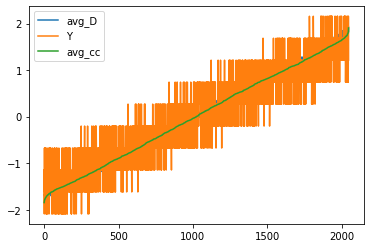

In [11]:
# check the correaltion of average degree and Y:
# transform the pyg data to networkx graph:
# import torch_utils
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler

import torch_geometric.utils as torch_utils
# import node_feature_utils as node_feature_utils
def node_cc_avg_feature(adj):
    g_cur = nx.from_numpy_array(adj)
    feats = nx.average_clustering(g_cur)
    return np.array(feats).astype(np.float32).reshape(1)


def check_corrs(dd):
    adjs = []
    ccs = []
    for d in dd:
        if d.edge_index.numel() < 1:
            N = d.x.shape[0]
            adj = np.ones(shape=(N, N))
        else:
            adj = torch_utils.to_dense_adj(d.edge_index).numpy()[0]
        adjs.append(adj)

    # use mlp to train:
    # import pickle as pk
    # ccpath = '/li_zhengdao/github/GenerativeGNN/DATA/syn_cc/processed/graphwise_syn_cc_0.9_class5_add_avg_cc.pkl'

    # with open(ccpath, 'rb') as f:
    #     cc = pk.load(f)
    #     print(len(cc))
    #     print(cc[4000])
        
        
    # cc = normalize(cc, along_axis=-1)
    
    
    avg_d = [graph_avg_degree(adj=adj) for adj in adjs]
    Y = [d.y.numpy().squeeze() for d in dd]

    avg_CC =[node_cc_avg_feature(adj=adj) for adj in adjs]
    
    # avg_CC = cc
    # ccddyy = list(zip(avg_CC, dd, Y))
    # np.random.shuffle(ccddyy)
    
    # avg_CC = [cc[0] for cc in ccddyy]
    # dd = [cc[1] for cc in ccddyy]
    # Y = [cc[2] for cc in ccddyy]
    # avg nodes:
    Ns = []
    for d in dd:
        Ns.append(d.x.shape[0])
    print('mean of Ns:', np.mean(Ns))
    
    avg_D = np.array(avg_d).squeeze()
    Y_arr = np.array([d.y.numpy().squeeze() for d in dd]).squeeze()
    avg_CC = np.array(avg_CC).squeeze()
    corr_avg_degree, _ = pearsonr(avg_D, Y_arr)
    corr_avg_cc, _ = pearsonr(avg_CC, Y_arr)

    # use spearman correlation:
    
    from scipy import stats
    from minepy import pstats, cstats

    # Assuming you have your linear regression model's predictions (y_pred) and ground truth Y (y_true)
    # Calculate Spearman correlation coefficient and p-value

    spearman_corr, p_value = stats.spearmanr(avg_D, Y_arr)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
    spearman_corr, p_value = stats.spearmanr(np.array(avg_CC).squeeze(), Y_arr)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
    print(f"P-value: {p_value:.6f}")
    
    
    print('Y set num: ', np.unique(Y))
    print('corr_avg_degree: ', corr_avg_degree)
    print('corr_avg_cc: ', corr_avg_cc)
    
    # X = avg_CC.reshape(-1, 1)
    X = avg_D.reshape(-1, 1)
    y = Y
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)

    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Create a SVM classifier
    clf = svm.SVC()

    # Train the model using the training sets
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Model Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # plot avg degree and Y:
    plt.figure()
    # sort avg_D
    avg_CC = np.array(avg_CC).squeeze()
    idx = np.argsort(avg_CC)
    
    plt.plot(normalize(avg_D[idx].reshape(-1, 1))[0].squeeze(), label='avg_D')
    plt.plot(normalize(Y_arr[idx].reshape(-1, 1))[0].squeeze(), label='Y')
    plt.plot(normalize(avg_CC[idx].reshape(-1, 1))[0].squeeze(), label='avg_cc')
    # plt.ylim([-2, 2])
    plt.legend()
    plt.show()

# check_corrs(d7)
# check_corrs(d8)
check_corrs(d9)

In [22]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume that you have loaded your data into X, and labels into y
# X = your data
# y = your labels
# It's a good practice to scale your data
X = cc
y = 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM classifier
clf = svm.SVC()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))





ValueError: n_classes(5) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(1)=2

In [ ]:
import torch
from torch_geometric.data import DataLoader
from torch.utils.data import random_split

root = 'DATA'
name = 'cc_0.8'
dataset = SynDataset(root=root, name=name)
print(dataset)

# save:

# dataset = cc_dataset
# train_size = int(0.8 * len(dataset))
# val_size = int(0.1 * len(dataset))
# test_size = len(dataset) - train_size - val_size

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_bipartite_graph(num_nodes_set1, num_nodes_set2, num_edges):
    G = nx.Graph()
    nodes_set1 = range(num_nodes_set1)
    nodes_set2 = range(num_nodes_set1, num_nodes_set1 + num_nodes_set2)

    G.add_nodes_from(nodes_set1, bipartite=0)
    G.add_nodes_from(nodes_set2, bipartite=1)

    while G.number_of_edges() < num_edges:
        u = random.choice(nodes_set1)
        v = random.choice(nodes_set2)
        if not G.has_edge(u, v):
            G.add_edge(u, v)

    return G

def draw_graph(G):
    pos = nx.bipartite_layout(G, [n for n, d in G.nodes(data=True) if d['bipartite'] == 0])
    nx.draw(G, pos, with_labels=True)
    plt.show()


# Generate same CC and different average degree datasets

- use bipartite graph to achive high average degree and low 0 CC
- 

20.085536923187668
corr_pp: 0.745742377307845
corr_pp_new: 0.6518249082033538
corr_itself: 0.9999999999999999
correlation of avg_degree and cc: 0.835380340940671 0.5443560769775972


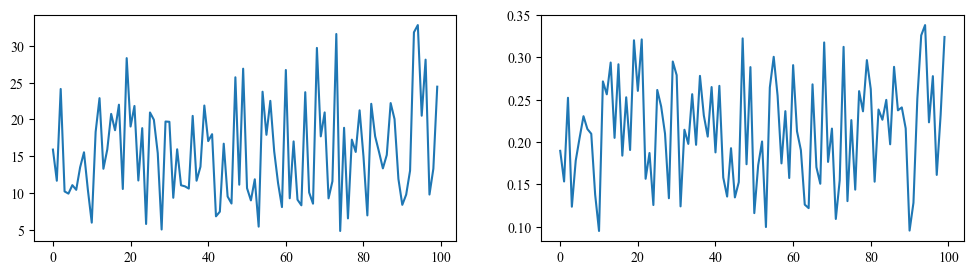

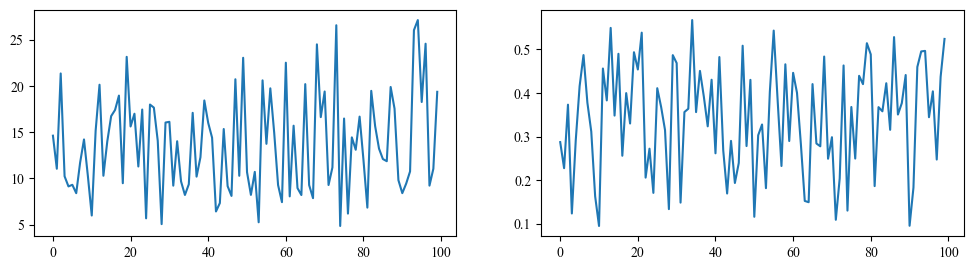

In [74]:

def plot_two_metrics(m1, m2, need_sort=False):
    if need_sort:
        sorted_xy = sorted(zip(m1, m2), key=lambda x: x[0])
        fig, axes = plt.subplots(1, 2, figsize=(12, 3), dpi=100)
        axes[0].plot([i[0] for i in sorted_xy])
        axes[1].plot([i[1] for i in sorted_xy])
        plt.show()
    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 3), dpi=100) 
        axes[0].plot(m1)
        axes[1].plot(m2)
        plt.show()
        

def ER_graphs_by_Degree(sample_num, class_num, node_num=100, min_Degree=4, max_Degree=40):
    """
    return labels and graphs.
    """
    er_nodes = node_num
    ori_degree = np.random.uniform(min_Degree, max_Degree, size=(sample_num,1))
    _, scaler = z_norm(ori_degree)
    
    n_degree = np.random.uniform(0, 1, size=(sample_num, 1))

    dd = scaler.inverse_transform(n_degree)

        
    ori_avg_degrees, ori_cc = [], []
    new_avg_degrees, new_cc = [], []
    
    # p  = np.linspace(0.1, 0.5, sample_num)

    # degree: 4 - 40, so p: degree/N = 0.04 - 0.4
    p = np.random.uniform(0.1, 0.4, size=(sample_num, ))
    sort_idx = np.argsort(p)
    # p = p[sort_idx]

    num_bi = np.linspace(0, 3, sample_num)
    num_bi_linear = np.linspace(0, 20, sample_num)
    # + np.random.randint(0, 6, size=(sample_num, ))
    
    
    # make num_bi exponentially increase:
    num_bi = np.exp(num_bi)
    
    bi_G = generate_bipartite_graph(10, 10, 100)
    tri = nx.complete_graph(3)
    print(num_bi[-1])
    
    for i in range(sample_num):
        G = nx.erdos_renyi_graph(er_nodes - 3 * int(num_bi_linear[sample_num - sort_idx[i] -1]), p[i])
        
        new_G = add_triangles(G, int(p[i]*50-5), tri)
        
        ori_avg_degrees.append(np.mean(np.sum(nx.to_numpy_matrix(G), axis=1)))
        ori_cc.append(nx.average_clustering(G))
        
        new_avg_degrees.append(np.mean(np.sum(nx.to_numpy_matrix(new_G), axis=1)))
        new_cc.append(nx.average_clustering(new_G))
        
    # labels:
    corr_pp, _ = pearsonr(ori_avg_degrees, p)
    corr_pp_new, _ = pearsonr(new_avg_degrees, p)
    print('corr_pp:', corr_pp)
    print('corr_pp_new:', corr_pp_new)
    corr_test, _ = pearsonr(2 * p, p)
    print('corr_itself:', corr_test)



    corr, _ = pearsonr(ori_avg_degrees, ori_cc)
    corr2, _ = pearsonr(new_avg_degrees, new_cc)
    print('correlation of avg_degree and cc:', corr, corr2)
    
    plot_two_metrics(ori_avg_degrees, ori_cc, need_sort=False)
    plot_two_metrics(new_avg_degrees, new_cc, need_sort=False)
    
datasets = ER_graphs_by_Degree(100, 10, node_num=100)

bi_corr:  0.999183314610858
bi_corr:  -0.042927312406459334
corr2:  0.5739741754183171
corr3:  0.5739741754183171
corr4:  0.5739741754183173
correlation of avg_degree and cc: 0.8906443996620291 -0.005006410064551902


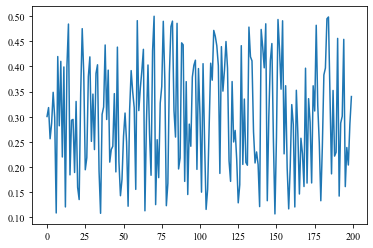

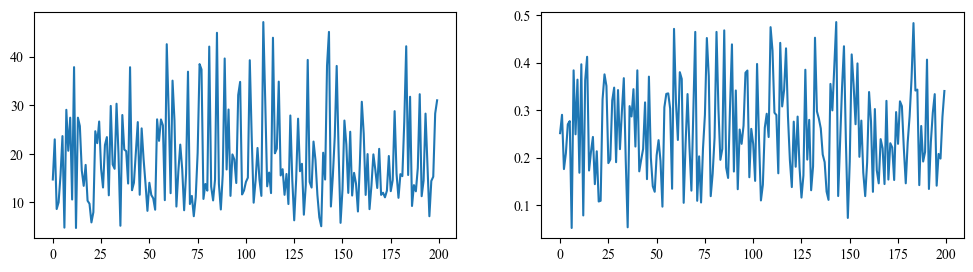

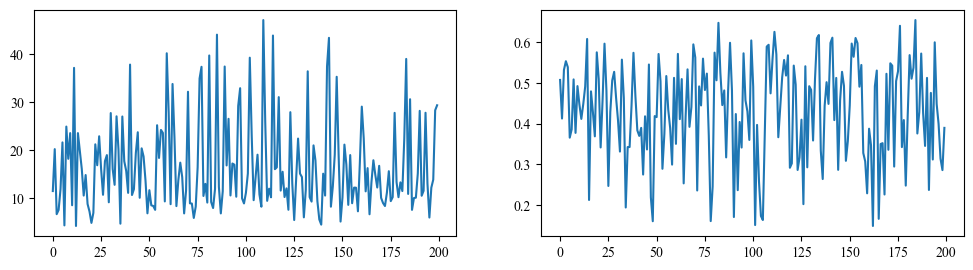

sum_rs: 0.81
(200,)
len samples: 200
(200, 1) (200,)
corr_cc 0.6823663055785
corr_degree 0.508885272298387
corr_cc_degree -0.0050064105753187226


In [65]:
# NOTE: Formally generate correlated graphs:

def ER_graphs_by_Degree(sample_num, class_num, rs, er_nodes=100, min_p=0.1, max_p=0.5, name=None):

    ori_p = np.random.uniform(min_p, max_p, size=(sample_num, 1))
    _, scaler = z_norm(ori_p)
    
    n_p = np.random.uniform(0, 1, size=(sample_num, 1))

    pp = scaler.inverse_transform(n_p)
    sort_idx = np.argsort(pp.squeeze())
    # pp = pp[sort_idx]

    plt.figure()
    plt.plot(pp.squeeze())

    ori_avg_degrees, ori_cc = [], []
    new_avg_degrees, new_cc = [], []
    
    num_bi_linear = np.linspace(0, 20, sample_num)

    bi_corr, _ = pearsonr(num_bi_linear.squeeze(), pp.squeeze()[sort_idx])
    print('bi_corr: ', bi_corr)
    

    num_bi_linear = num_bi_linear[sort_idx]

    # + np.random.randint(0, 6, size=(sample_num, ))
    bi_corr, _ = pearsonr(num_bi_linear.squeeze(), pp.squeeze())
    print('bi_corr: ', bi_corr)


    tri = nx.complete_graph(3)
    samples = []
    for i in range(sample_num):

        G = nx.erdos_renyi_graph(er_nodes - 3 * int(num_bi_linear[-i]), pp[i])
        
        new_G = add_triangles(G, int(num_bi_linear[-i]), tri)
        
        ori_avg_degrees.append(np.mean(np.sum(nx.to_numpy_matrix(G), axis=1)))
        ori_cc.append(nx.average_clustering(G))
        
        new_avg_degrees.append(np.mean(np.sum(nx.to_numpy_matrix(new_G), axis=1)))
        new_cc.append(nx.average_clustering(new_G))

        samples.append(new_G)
        
    # use numpy argsort new_avg_degrees:
    # sort_idx = np.argsort(new_avg_degrees)
    new_avg_degrees = np.array(new_avg_degrees)
    new_cc = np.array(new_cc)

    # _, scaler = z_norm(new_avg_degrees)
    # n_d = np.random.uniform(0, 1, size=(sample_num, 1))

    # non-linear, try 
    # labels:
    corr2, _  = pearsonr(pp.squeeze(), new_avg_degrees)
    # corr3, _  = pearsonr(n_p.squeeze()[sort_idx], new_avg_degrees)
    corr3, _  = pearsonr(n_p.squeeze(), new_avg_degrees)
    corr4, _  = pearsonr(n_p[sort_idx].squeeze(), new_avg_degrees[sort_idx])


    
    print('corr2: ', corr2)
    print('corr3: ', corr3)
    print('corr4: ', corr4)
    corr, _ = pearsonr(ori_avg_degrees, ori_cc)
    corr2, _ = pearsonr(new_avg_degrees, new_cc)
    print('correlation of avg_degree and cc:', corr, corr2)
    
    plot_two_metrics(ori_avg_degrees, ori_cc, need_sort=False)
    plot_two_metrics(new_avg_degrees, new_cc, need_sort=False)
    
    n_y = np.random.uniform(0, 1, size=(sample_num, 1))
    
    Y = get_Y([n_p, n_y], class_num, rs=rs, is_uniform=True)
    
    print(Y.shape)
    print('len samples:', len(samples))
    
    # if abs(corr_degree) > 0.1, regenerate the samples.
    # samples = [samples[i] for i in sort_idx]

    avg_degree = np.array([graph_avg_degree(nx.to_numpy_matrix(g)) for g in samples])
    
    print(avg_degree.shape, Y.squeeze().shape)
    
    corr_degree, _ = pearsonr(avg_degree.reshape(-1, 1).squeeze(), Y.squeeze())
    corr_cc, _ = pearsonr(np.array(new_cc), Y.squeeze())
    corr_cc_degree, _ = pearsonr(np.array(new_cc), avg_degree.reshape(-1, 1).squeeze())
    
    # corr_degree = np.corrcoef(Y, avg_degree)[0, 1]
    print('corr_cc', corr_cc)
    print('corr_degree', corr_degree)
    print('corr_cc_degree', corr_cc_degree)
    
    # if abs(corr_degree) >= 0.1:
    #     print('no ok:', corr_degree)
    #     return False
    # else:
    #     print('corr:', corr_degree)
    
    
    pyg_data = convert_to_torch_geometric_data(samples, Y)
    return pyg_data
    root = 'DATA'
    name = f'cc_{rs[0]}' if name is None else name
    # if not os.path.exists(root):
    #     os.mkdir(root)
    # data_path = os.path.join(root, f'syn_{name}.pkl')
    # with open(data_path, 'wb') as f:
    #     pk.dump(pyg_data, f)
    return pyg_data

degree_datasets = ER_graphs_by_Degree(200, 10, rs=[0.9], er_nodes=100)

In [25]:
n_p = np.random.uniform(0.1, 0.4, size=(1000, 1))
print(np.max(n_p), np.min(n_p))
plt.plot()

0.39993719896524504 0.10044983327496095


In [ ]:
ori_p = np.random.uniform(0.1, 0.5, size=(100, 1))
_, scaler = z_norm(ori_p)

n_p = np.random.uniform(0, 1, size=(100, 1))
pp = scaler.inverse_transform(n_p)

plt.figure()
plt.plot(ori_p)
plt.plot(pp)

In [ ]:
cc_uniform = np.random.normal(1, 10, size=1000)

std =  np.std(cc_uniform)
print('std1: ', std)
print("cc_uniform: ", cc_uniform.shape)

dd, scaler = z_norm(cc_uniform.reshape(-1, 1))
dd = dd*15

new_cc = np.random.normal(0, 1, size=1000)
# std=  np.std(cc)

old_cc = new_cc * std
# old_cc = scaler.inverse_transform(new_cc.reshape(-1, 1))

# NOTE: for normal and uniform, the recover approach is not different !!!!!!

plt.figure()
plt.plot(cc_uniform)
plt.figure()
plt.plot(old_cc)
plt.legend("me", loc="upper center")
plt.tight_layout()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Beta distribution parameters
params = [
    (1, 1),  # Uniform distribution
    (2, 2),  # Symmetric U-shaped distribution
    (3, 3),  # Symmetric bell-shaped distribution
    (2, 5),  # Right-skewed distribution
    (5, 2),  # Left-skewed distribution
    (0.5, 0.5),  # Bimodal distribution
    (10, 1),  # Distribution concentrated near 1
    (1, 10)  # Distribution concentrated near 0
]

# Number of samples
n_samples = 1000

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

for i, (a, b) in enumerate(params):
    # Generate samples from the Beta distribution
    samples = beta.rvs(a, b, size=n_samples)

    # Plot histogram
    axes[i].hist(samples, bins=50, density=True, alpha=0.7)
    axes[i].set_title(f'α={a}, β={b}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
